In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [12]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )

The current size of our dataset is : 
X_train ->  (60000, 28, 28) 
y_train ->  (60000,) 
X_test ->  (10000, 28, 28) 
y_test (10000,)


In [13]:
X_train = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)


print('The current size of our dataset is : \nX_train -> '
      ,X_train.shape,'\ny_train -> ' , y_train.shape, '\nX_test -> ' 
      , X_test.shape,'\ny_test' , y_test.shape )


# now we normalize our data
X_train = X_train/255
X_test = X_test/255

The current size of our dataset is : 
X_train ->  (60000, 784) 
y_train ->  (60000,) 
X_test ->  (10000, 784) 
y_test (10000,)


In [14]:
X_train_small,y_train_small = X_train[:30000],y_train[:30000] 
X_test_small,y_test_small = X_test[:5000],y_test[:5000] 

from sklearn.svm import SVC
Svm = SVC(kernel='rbf')
Svm.fit(X_train_small, y_train_small)

y_pred = Svm.predict(X_test_small)

accuracy = np.sum(y_pred == y_test[:5000]) / len(y_test[:5000])

print(f"Predicted labels: {y_pred[:50]}")
print(f"Actual labels:    {y_test[:1000][:50]}")
print(f"Accuracy: {accuracy * 100:.2f}%")


'''
If the data isn't linearly separable (meaning we can't draw a straight 
line to separate the classes), SVM uses kernels (like the RBF kernel) 
to transform the data into a higher-dimensional space where it can be 
linearly separated. the RBF kernel maps data points into a space where 
the SVM can draw a boundary that separates the classes more easily, 
even though the original data wasnt linearly separable.

Once the SVM has trained and found the best boundary (hyperplane), 
for a new point, it simply checks which side of the boundary the point 
lies on. If its on one side, its classified as one class, and if its 
on the other side, its classified as the other class.

Binary SVM can only distinguish between two classes.
For multi-class classification (like your 10 classes), 
SVM uses One vs Rest or One vs One  to break the problem down 
into multiple binary classification tasks.

In our case with 10 classes, SVM will train 10 classifiers 
(One-vs-Rest), and for each test point, it will predict the class 
with the highest score.
'''


Predicted labels: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Actual labels:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4]
Accuracy: 96.26%


"\nIf the data isn't linearly separable (meaning we can't draw a straight \nline to separate the classes), SVM uses kernels (like the RBF kernel) \nto transform the data into a higher-dimensional space where it can be \nlinearly separated. the RBF kernel maps data points into a space where \nthe SVM can draw a boundary that separates the classes more easily, \neven though the original data wasnt linearly separable.\n\nOnce the SVM has trained and found the best boundary (hyperplane), \nfor a new point, it simply checks which side of the boundary the point \nlies on. If its on one side, its classified as one class, and if its \non the other side, its classified as the other class.\n\nBinary SVM can only distinguish between two classes.\nFor multi-class classification (like your 10 classes), \nSVM uses One vs Rest or One vs One  to break the problem down \ninto multiple binary classification tasks.\n\nIn our case with 10 classes, SVM will train 10 classifiers \n(One-vs-Rest), and for eac

In [15]:
from sklearn.metrics import classification_report
report = classification_report(y_test[:5000], y_pred[:5000], output_dict=True)
    
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

{'Accuracy': accuracy,'Precision': precision, 'Recall': recall, 'F1-Score': f1, 'Model': Svm.__class__.__name__}

{'Accuracy': np.float64(0.9626),
 'Precision': 0.9625778422890188,
 'Recall': 0.9626,
 'F1-Score': 0.9625103601519953,
 'Model': 'SVC'}

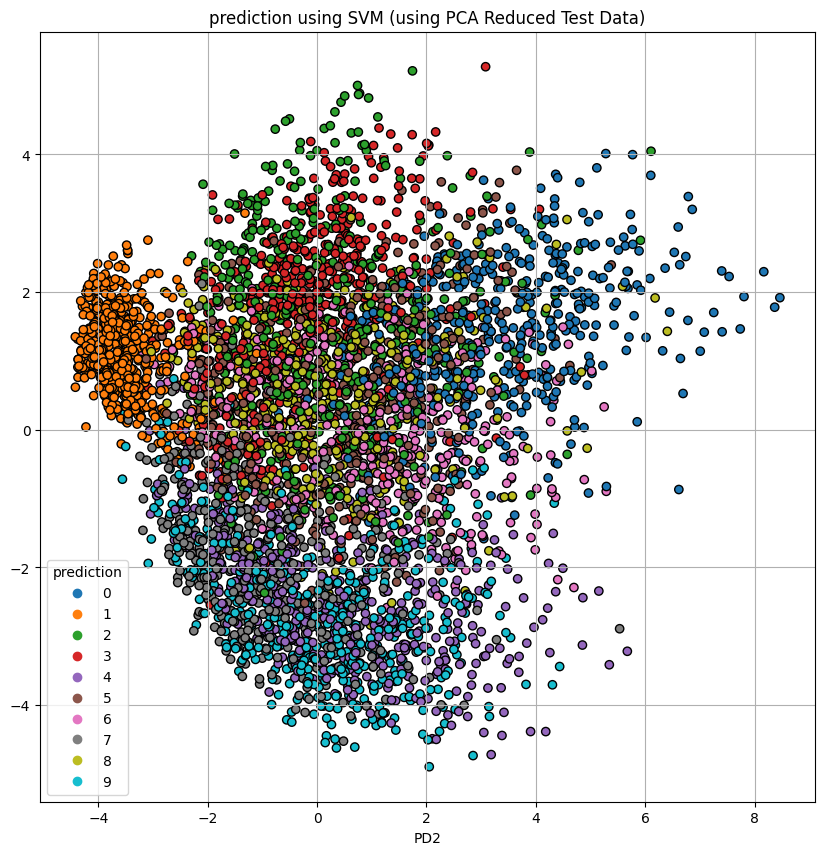

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_test_small)
plt.figure(figsize=(10,10))
scatter = plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(),title = 'prediction')
plt.title("prediction using SVM (using PCA Reduced Test Data)")
plt.xlabel('PD1')
plt.xlabel('PD2')
plt.grid(True)
plt.show()

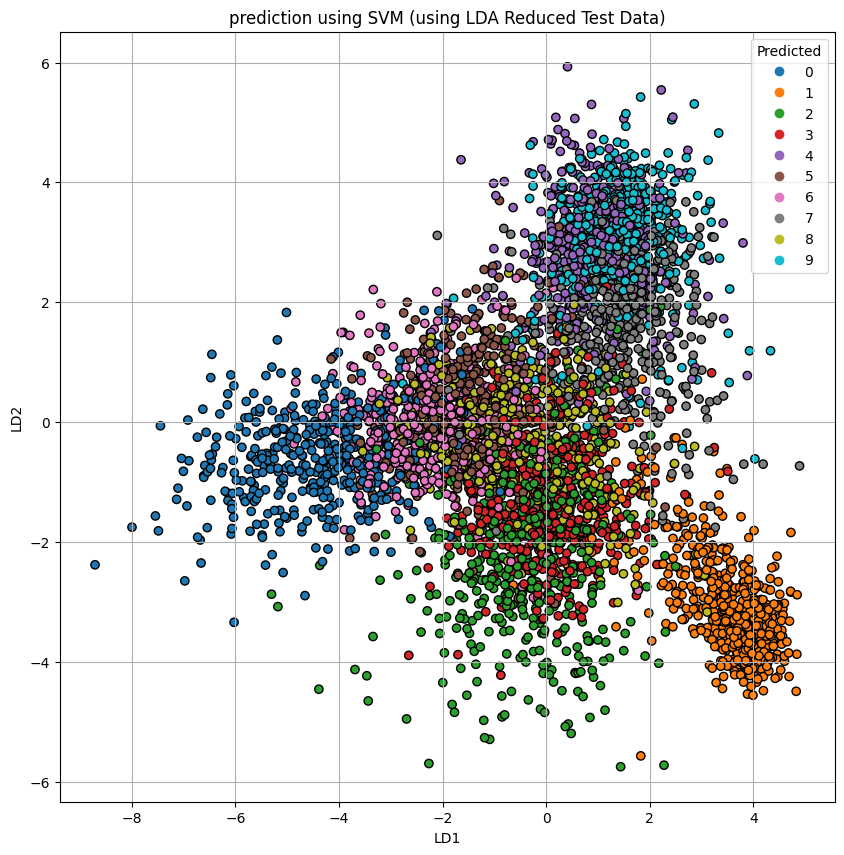

'\nwe can see that the accuracy is around 87.50%. \nA lot of the digits are overlapping (3,8,2) , (6,5), (4,9)\nand other overlaps as well\nso SVM gets confused in those crowded areas. \nSome classes clear and SVM is doing decently good job\n'

In [17]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_reduced = lda.fit_transform(X_test_small, y_test_small)

'''
Here, we reduced the test data (X_test_small) into 2D using LDA, 
which tries to separate classes based on the true labels (y_test_small).
Then we visualized the predicted labels (y_pred) using colors.
If the same-colored points cluster together, it means the model is 
doing a decent job.
However, we notice overlaps (like between 3,8,2,6), which 
likely confused the model, leading to lower accuracy.
'''
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='tab10', edgecolor='k')
plt.legend(*scatter.legend_elements(), title="Predicted")
plt.title("prediction using SVM (using LDA Reduced Test Data)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.grid(True)
plt.show()

'''
we can see that the accuracy is around 87.50%. 
A lot of the digits are overlapping (3,8,2) , (6,5), (4,9)
and other overlaps as well
so SVM gets confused in those crowded areas. 
Some classes clear and SVM is doing decently good job
'''


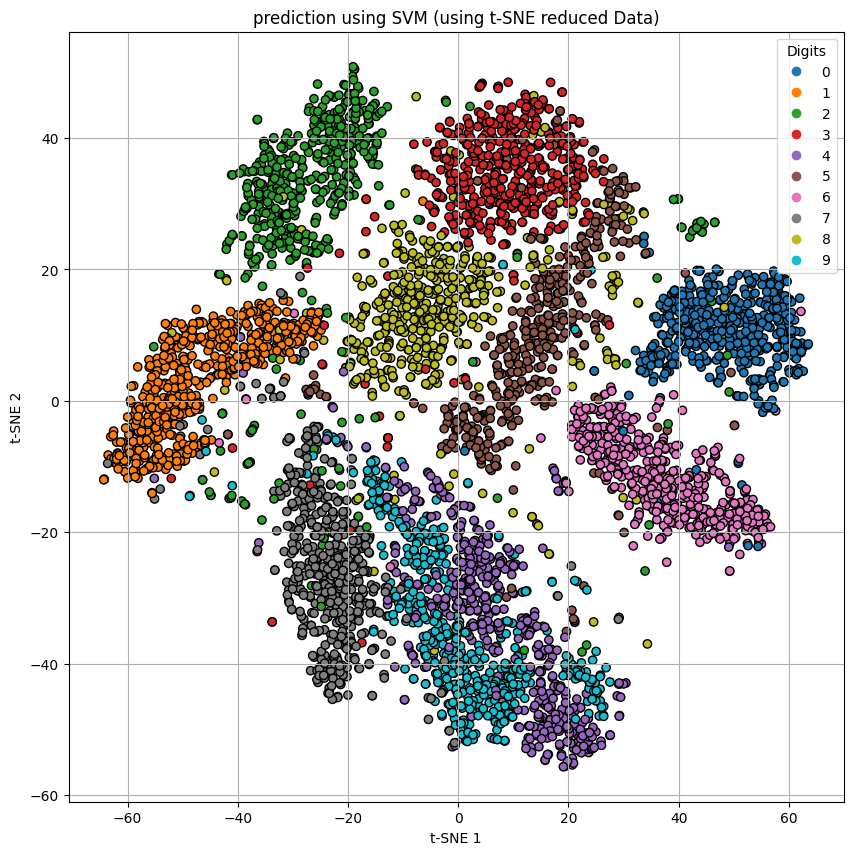

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_test_small)

plt.figure(figsize=(10,10))
scatter = plt.scatter(X_tsne[:, 0],X_tsne[:, 1],c=y_pred,cmap='tab10',edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title("prediction using SVM (using t-SNE reduced Data)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

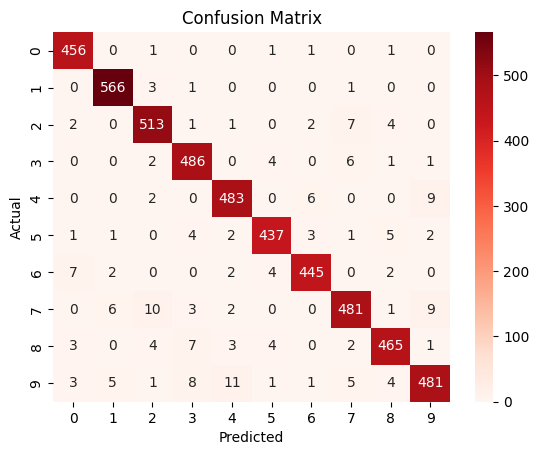

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_small, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


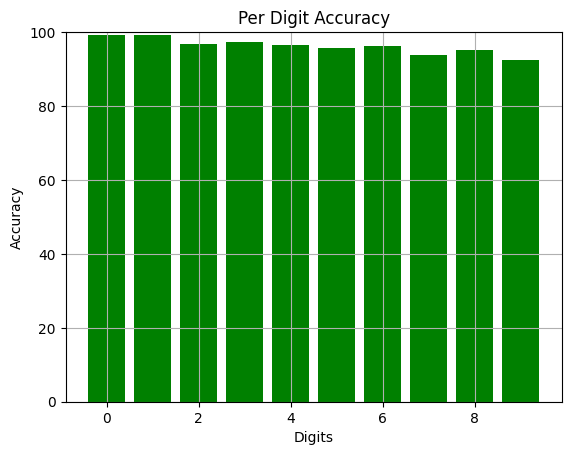

In [21]:
import numpy as np

accuracies = []
for digit in range(10):
    idx = (y_test_small == digit)
    correct = (y_pred[idx] == digit).sum()
    total = idx.sum()
    accuracies.append(correct / total * 100)

plt.bar(range(10), accuracies, color='green')
plt.xlabel("Digits")
plt.ylabel("Accuracy")
plt.title("Per Digit Accuracy")
plt.ylim(0, 100)
plt.grid(True)
plt.show()


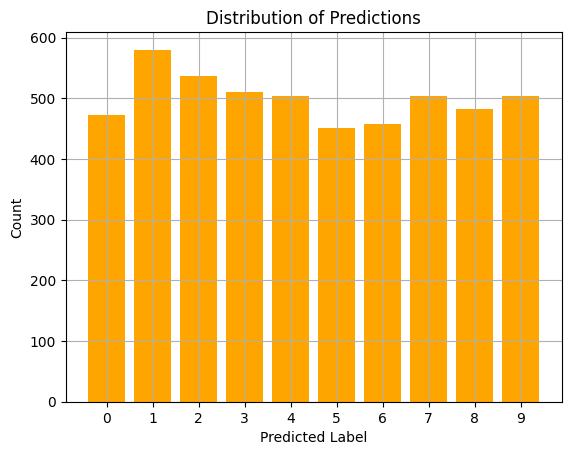

In [22]:
plt.hist(y_pred, bins=np.arange(11)-0.5, rwidth=0.8, color='orange')
plt.xticks(range(10))
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predictions")
plt.grid(True)
plt.show()


In [24]:
def rbf_kernel(X, Y, gamma=1e-3):
    XX = np.sum(X**2, axis=1).reshape(-1, 1)
    YY = np.sum(Y**2, axis=1).reshape(1, -1)
    dist = XX + YY - 2 * np.dot(X, Y.T)
    return np.exp(-gamma * dist)

def compute_mmd(X, Y, gamma=1e-3):
    K_xx = rbf_kernel(X, X, gamma)
    K_yy = rbf_kernel(Y, Y, gamma)
    K_xy = rbf_kernel(X, Y, gamma)
    m, n = X.shape[0], Y.shape[0]
    return np.sum(K_xx)/(m**2) + np.sum(K_yy)/(n**2) - 2*np.sum(K_xy)/(m*n)

samples_per_class = 3000
digit_data = {i: X_train[y_train == i][:samples_per_class] for i in range(10)}

mmd_matrix = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        mmd_matrix[i, j] = compute_mmd(digit_data[i], digit_data[j])

avg_mmd = np.mean(mmd_matrix, axis=1)
print(f"\nAverage MMD per class: {np.round(avg_mmd, 4)}")

import scipy.special
class_weights = scipy.special.softmax(avg_mmd)


sample_weights = np.array([class_weights[label] for label in y_train_small])

clf_weighted = SVC(kernel='rbf')
clf_weighted.fit(X_train_small, y_train_small, sample_weight=sample_weights)
y_pred_weighted = clf_weighted.predict(X_test_small)
weighted_accuracy = np.mean(y_pred_weighted == y_test_small)

print(f"\nMMD-Weighted original_accuracy: {weighted_accuracy * 100:.2f}%")
print(f"Change in original_accuracy: {(weighted_accuracy - accuracy) * 100:.2f}%")


Average MMD per class: [0.0589 0.0516 0.0365 0.0379 0.0364 0.0284 0.0412 0.0418 0.0309 0.0329]

MMD-Weighted original_accuracy: 93.18%
Change in original_accuracy: -3.08%


In [26]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.linalg import fractional_matrix_power

def coral(source, target, regularization=1e-3):
    cov_source = np.cov(source, rowvar=False) + regularization * np.eye(source.shape[1])
    cov_target = np.cov(target, rowvar=False) + regularization * np.eye(target.shape[1])
    cov_source_sqrt = fractional_matrix_power(cov_source, 0.5)
    cov_target_sqrt_inv = fractional_matrix_power(cov_target, -0.5)
    aligned_target = (target - target.mean(axis=0)) @ cov_target_sqrt_inv @ cov_source_sqrt + source.mean(axis=0)
    return aligned_target

n_components = 50
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_small)

Svm = SVC(kernel='rbf')
Svm.fit(X_train_pca, y_train_small)

X_test_aligned = coral(X_train_pca, X_test_pca)

y_pred_coral = Svm.predict(X_test_aligned)
coral_accuracy = accuracy_score(y_test_small, y_pred_coral)
print(f"CORAL-Aligned Accuracy: {coral_accuracy * 100:.2f}%")
print(f"Accuracy change: {(coral_accuracy - accuracy) * 100:.2f}%")

CORAL-Aligned Accuracy: 96.24%
Accuracy change: -0.02%
